### Dependencies

In [30]:
import pandas as pd


In [31]:
# Load the test and train data
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [32]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [33]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [34]:
# Look at top 10 most influencial categories that will be useful to predict sales price (due to time limit and capacity)
(train.corr()**2)['SalePrice'].sort_values(ascending=False)[:11]

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
Name: SalePrice, dtype: float64

In [35]:
# Make a DataFrame for test data to only include the top 10 most influential factors on sales price of property
new_test = test[["Id", "OverallQual","GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd"]]
new_test

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,1461,5,896,1.0,730.0,882.0,896,1,5
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6
2,1463,5,1629,2.0,482.0,928.0,928,2,6
3,1464,6,1604,2.0,470.0,926.0,926,2,7
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5
...,...,...,...,...,...,...,...,...,...
1454,2915,4,1092,0.0,0.0,546.0,546,1,5
1455,2916,4,1092,1.0,286.0,546.0,546,1,6
1456,2917,5,1224,2.0,576.0,1224.0,1224,1,7
1457,2918,5,970,0.0,0.0,912.0,970,1,6


In [36]:
# Make a DataFrame for train data to only include the top 10 most influential factors on sales price of property
new_train = train[["Id", "OverallQual","GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd","SalePrice"]]
new_train

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,SalePrice
0,1,7,1710,2,548,856,856,2,8,208500
1,2,6,1262,2,460,1262,1262,2,6,181500
2,3,7,1786,2,608,920,920,2,6,223500
3,4,7,1717,3,642,756,961,1,7,140000
4,5,8,2198,3,836,1145,1145,2,9,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1456,6,1647,2,460,953,953,2,7,175000
1456,1457,6,2073,2,500,1542,2073,2,7,210000
1457,1458,7,2340,1,252,1152,1188,2,9,266500
1458,1459,5,1078,1,240,1078,1078,1,5,142125


### Cleaning the data

In [37]:
# Firstly, combine the test and train data back together 
#in order to fix any gaps in the data such as NaNs.

#Note to self: top part of DataFrame is test data and bottom part is train data

combined_data = pd.concat((new_test, new_train)).reset_index(drop=True)
combined_data

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,SalePrice
0,1461,5,896,1.0,730.0,882.0,896,1,5,NaN
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6,NaN
2,1463,5,1629,2.0,482.0,928.0,928,2,6,NaN
3,1464,6,1604,2.0,470.0,926.0,926,2,7,NaN
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5,NaN
...,...,...,...,...,...,...,...,...,...,...
2914,1456,6,1647,2.0,460.0,953.0,953,2,7,175000.0
2915,1457,6,2073,2.0,500.0,1542.0,2073,2,7,210000.0
2916,1458,7,2340,1.0,252.0,1152.0,1188,2,9,266500.0
2917,1459,5,1078,1.0,240.0,1078.0,1078,1,5,142125.0


In [38]:
# Drop the Sales Price column first as the test data 
# does not have this information.
combined_data.drop(["SalePrice"], axis=1, inplace=True)
combined_data

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,1461,5,896,1.0,730.0,882.0,896,1,5
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6
2,1463,5,1629,2.0,482.0,928.0,928,2,6
3,1464,6,1604,2.0,470.0,926.0,926,2,7
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5
...,...,...,...,...,...,...,...,...,...
2914,1456,6,1647,2.0,460.0,953.0,953,2,7
2915,1457,6,2073,2.0,500.0,1542.0,2073,2,7
2916,1458,7,2340,1.0,252.0,1152.0,1188,2,9
2917,1459,5,1078,1.0,240.0,1078.0,1078,1,5


In [39]:
# Check if there are any null values in the dataset
print(combined_data.isnull().sum().to_string())

Id              0
OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0


#### Looks like there are null data in the columns: "GarageCars", "GarageArea" and "TotalBsmtSF".

In [40]:
# Fill in those rows with NA as "None" as they most likely do not have any
# values
combined_data["GarageCars"] = combined_data["GarageCars"].fillna(0)
combined_data["GarageArea"] = combined_data["GarageArea"].fillna(0)
combined_data["TotalBsmtSF"] = combined_data["TotalBsmtSF"].fillna(0)
combined_data

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,1461,5,896,1.0,730.0,882.0,896,1,5
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6
2,1463,5,1629,2.0,482.0,928.0,928,2,6
3,1464,6,1604,2.0,470.0,926.0,926,2,7
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5
...,...,...,...,...,...,...,...,...,...
2914,1456,6,1647,2.0,460.0,953.0,953,2,7
2915,1457,6,2073,2.0,500.0,1542.0,2073,2,7
2916,1458,7,2340,1.0,252.0,1152.0,1188,2,9
2917,1459,5,1078,1.0,240.0,1078.0,1078,1,5


In [41]:
# Check the data type of each column
combined_data.dtypes

Id                int64
OverallQual       int64
GrLivArea         int64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
dtype: object

In [42]:
# Check if any of the columns in the DataFrame has a null data
combined_data.isnull().sum()

Id              0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [43]:
combined_data["OverallQual"].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

In [44]:
combined_data.dtypes

Id                int64
OverallQual       int64
GrLivArea         int64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
dtype: object

## Split the data into test and train again

In [45]:
# Split the data into it's original respective dataset
#Set up the features
x_test = combined_data[:1459]
x_train = combined_data[1459:]

#Set up the target
y=pd.DataFrame(data = train['SalePrice'])

In [46]:
#Remove IDs from both x_test and x_train
new_x_test = x_test[["OverallQual","GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd"]]

new_x_train = x_train[["OverallQual","GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd"]]

In [47]:
y.shape

(1460, 1)

In [48]:
new_x_test.dtypes

OverallQual       int64
GrLivArea         int64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
dtype: object

## Standardising our dataset

In [49]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import tree

from sklearn.linear_model import LinearRegression

In [50]:
new_x_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
1459,7,1710,2.0,548.0,856.0,856,2,8
1460,6,1262,2.0,460.0,1262.0,1262,2,6
1461,7,1786,2.0,608.0,920.0,920,2,6
1462,7,1717,3.0,642.0,756.0,961,1,7
1463,8,2198,3.0,836.0,1145.0,1145,2,9


In [51]:
new_x_train.dtypes

OverallQual       int64
GrLivArea         int64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
dtype: object

In [52]:
# THIS MIGHT BE REDUNDANT BECAUSE THERE IS NO CATEGORICAL DATA, CHECK AND DELETE.
new_x_train = pd.get_dummies(new_x_train)
new_x_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
1459,7,1710,2.0,548.0,856.0,856,2,8
1460,6,1262,2.0,460.0,1262.0,1262,2,6
1461,7,1786,2.0,608.0,920.0,920,2,6
1462,7,1717,3.0,642.0,756.0,961,1,7
1463,8,2198,3.0,836.0,1145.0,1145,2,9


In [99]:
# Use train_test_split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(new_x_train, y, random_state=42)

In [101]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
2351,6,1068,1.0,264.0,1059.0,1068,1,6
2564,8,2622,2.0,712.0,1463.0,1500,2,9
1872,5,1028,2.0,360.0,1008.0,1028,1,5
1981,6,1664,2.0,420.0,1004.0,1004,2,7
2495,9,1620,3.0,912.0,1620.0,1620,2,6
...,...,...,...,...,...,...,...,...
2447,6,2030,2.0,551.0,848.0,1118,2,8
1702,6,1217,1.0,288.0,626.0,626,1,6
2801,8,2169,2.0,647.0,1284.0,1284,2,7
2516,7,1850,2.0,467.0,973.0,979,2,7


In [110]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [111]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [104]:
X_train_scaled[0]

array([ 0.63707336, -0.0516431 ,  0.29383068, -0.19261743,  0.64289267,
        0.86209245,  0.77287226,  0.2681771 ])

In [112]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

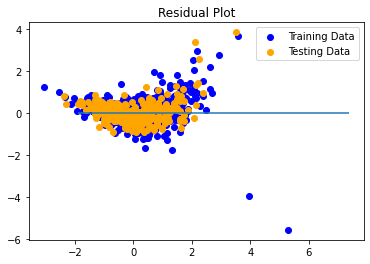

In [108]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [96]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 35211396439.5519, R2: 0.7957734508354596


In [113]:
from pickle import dump

# Saving the model to a pickle file
dump(model, open('model.pkl', 'wb'))
dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))


In [114]:
from pickle import load
loaded_model = load(open('model.pkl', 'rb')) 
loaded_X_scaler = load(open('X_scaler.pkl', 'rb')) 
loaded_y_scaler = load(open('y_scaler.pkl', 'rb')) 

In [ ]:
data = [6,1068,1,264,1059.0,1068,1,6]
arr = np.asarray([data])
arr = X_scaler.transform(arr)
reshape_arr = arr.reshape(1, -1)
prediction_data = model.predict(reshape_arr)
prediction_amount = y_scaler.inverse_transform(prediction_data)
print(round(prediction_amount[0][0],0))

## Testing the model

In [71]:
X_test_scaled[0]

array([-0.09492594, -0.87903489, -1.06949386, -1.01459674, -0.00397467,
       -0.26524032, -1.06290892, -0.34744958])

In [87]:
# Testing what happens if user input and using code to compile the data into an array
data = [6,1068,1,264,1059.0,1068,1,6]
arr = np.asarray([data])
arr = X_scaler.transform(arr)
reshape_arr = arr.reshape(1, -1)
prediction_data = model.predict(reshape_arr)
prediction_amount = y_scaler.inverse_transform(prediction_data)
print(round(prediction_amount[0][0],0))

141691.0


In [ ]:
X_test_scaled = X_scaler.transform(new_x_train)

In [ ]:
X_test_scaled[0]

In [73]:
data = X_test_scaled[0]
new_data = data.reshape(1, -1)

prediction_data = model.predict(new_data)
prediction_data

array([[-0.51362506]])

In [78]:
prediction_amount = y_scaler.inverse_transform(prediction_data)
prediction_amount[0][0]

141690.8899896985

In [83]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2377625889018781, R2: 0.7939330724951675


In [84]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.235639530365686, R2: 0.7957731102886934


In [85]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23692223636850035, R2: 0.7946613992911276


In [ ]:
# Need to split the columns into categorical and non-categorical and do the one-hot encoding.
# Find a model to do machine learning
# Save the training model
# Figure out how to deploy to Heroku etc